# Random Forest

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('combined_data.csv', delimiter=';')

# Preprocessing: Convert Timestamp to datetime and extract hour for better prediction
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour

In [4]:
data.head()

,Timestamp,Module Temperature,Irradiance,Temperature,Humidity,Pressure,Wind Speed,Wind Direction,Rain,PV yield counter,Hour
0,2022-09-10 00:00:00,12.500,7.500,13.7,89.0,1001.4,1.4,330.0,0.0,0.0,0
1,2022-09-10 01:00:00,12.775,7.528,13.0,90.0,1000.8,1.7,350.0,0.0,0.0,1
2,2022-09-10 02:00:00,12.262,9.034,13.2,92.0,1000.3,1.4,350.0,0.0,0.0,2
3,2022-09-10 03:00:00,11.972,9.034,10.2,94.0,999.7,1.4,330.0,0.0,0.0,3
4,2022-09-10 04:00:00,11.810,8.281,10.7,95.0,999.8,1.7,300.0,0.0,0.0,4


In [5]:

features = ['Module Temperature', 'Irradiance', 'Temperature', 'Humidity', 'Pressure', 'Wind Speed', 'Wind Direction', 'Rain', 'Hour']
target = 'PV yield counter'


In [6]:

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

average_y_test = y_test.mean()
average_predictions = predictions.mean()


mape = abs((average_y_test - average_predictions) / average_y_test) * 100


# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 5.602761635944701
Mean Squared Error (MSE): 155.93705172111
Root Mean Squared Error (RMSE): 12.48747579461558
R^2 Score: 0.9289870177088221
Mean Absolute Percentage Error (MAPE): 1.24%


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training set
train_predictions = random_forest_model.predict(X_train)

train_mae = mean_absolute_error(y_train, train_predictions)

train_mse = mean_squared_error(y_train, train_predictions)

train_rmse = mean_squared_error(y_train, train_predictions, squared=False)

train_r2 = r2_score(y_train, train_predictions)

average_y_train = y_train.mean()
average_train_predictions = train_predictions.mean()
train_mape = abs((average_y_train - average_train_predictions) / average_y_train) * 100

print("Training Data Metrics:")
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Root Mean Squared Error (RMSE): {train_rmse}')
print(f'R² Score: {train_r2}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape:.2f}%')


mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
average_y_test = y_test.mean()
average_predictions = predictions.mean()
mape = abs((average_y_test - average_predictions) / average_y_test) * 100

# Print metrics for test data
print("\nTest Data Metrics:")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Training Data Metrics:
Mean Absolute Error (MAE): 2.025474374009508
Mean Squared Error (MSE): 22.138657528699422
Root Mean Squared Error (RMSE): 4.705173485505016
R² Score: 0.9898017471744619
Mean Absolute Percentage Error (MAPE): 0.38%

Test Data Metrics:
Mean Absolute Error (MAE): 5.602761635944701
Mean Squared Error (MSE): 155.93705172111
Root Mean Squared Error (RMSE): 12.48747579461558
R² Score: 0.9289870177088221
Mean Absolute Percentage Error (MAPE): 1.24%


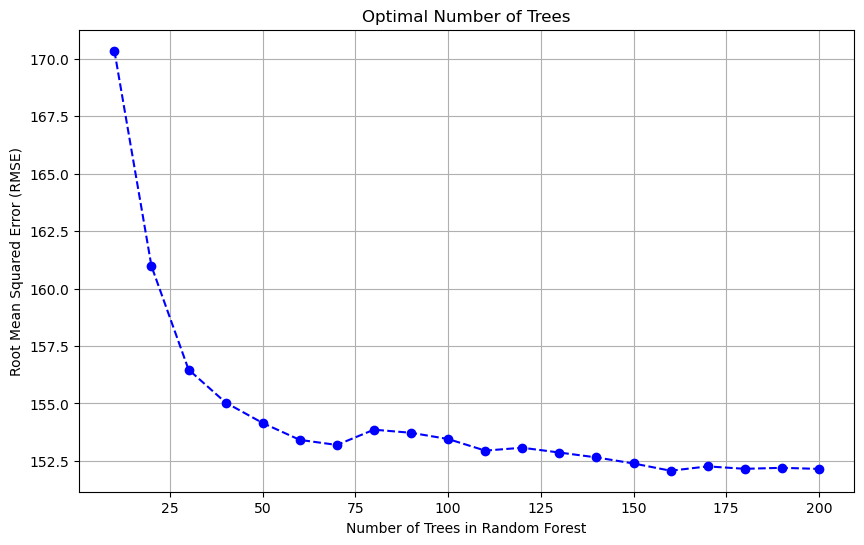

In [7]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define a range of n_estimators values to test
estimator_range = range(10, 201, 10)


cv_scores = []
for estimator in estimator_range:
    model = RandomForestRegressor(n_estimators=estimator, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())


plt.figure(figsize=(10, 6))
plt.plot(estimator_range, cv_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Optimal Number of Trees')
plt.grid(True)
plt.show()


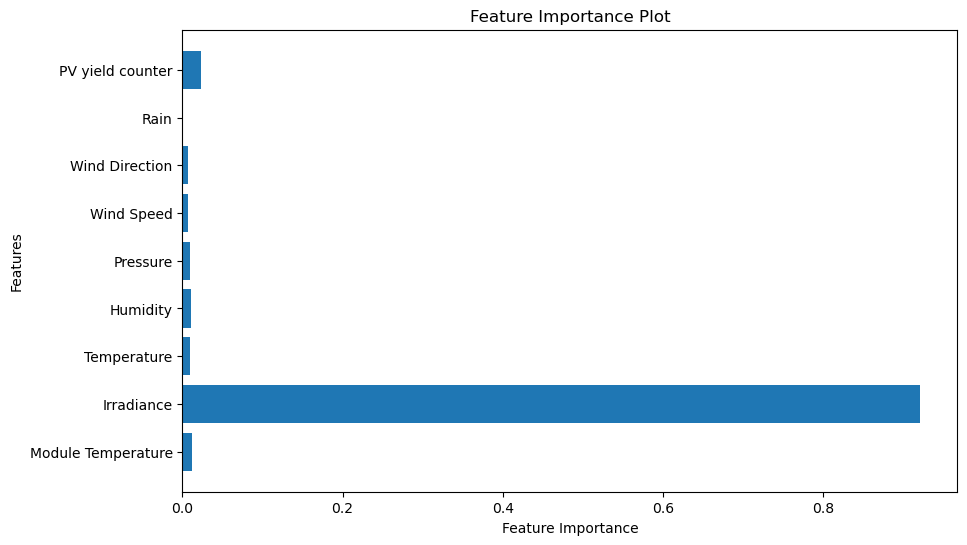

In [10]:
# Assuming your model is already trained and named 'random_forest_model'
import matplotlib.pyplot as plt

feature_importances = random_forest_model.feature_importances_

features_all = ['Module Temperature', 'Irradiance', 'Temperature', 'Humidity', 'Pressure', 'Wind Speed', 'Wind Direction', 'Rain', 'PV yield counter']

plt.figure(figsize=(10, 6))
plt.barh(features_all, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


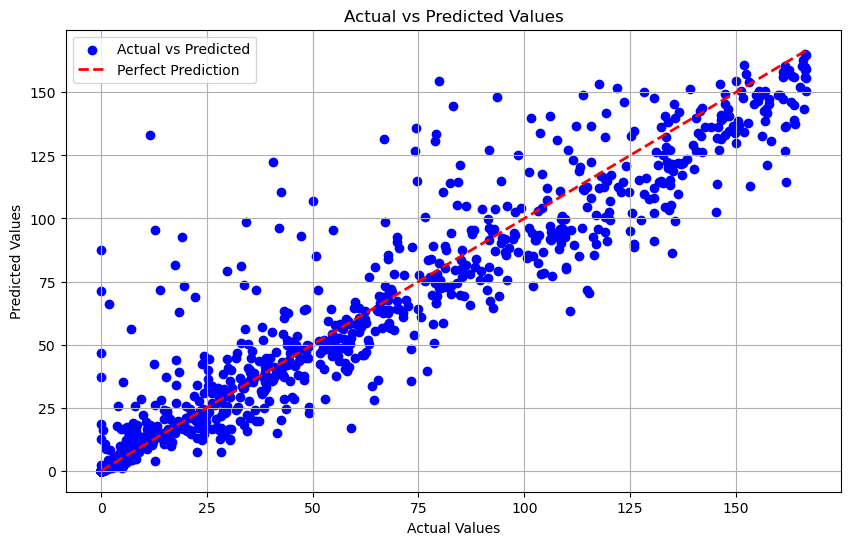

In [11]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


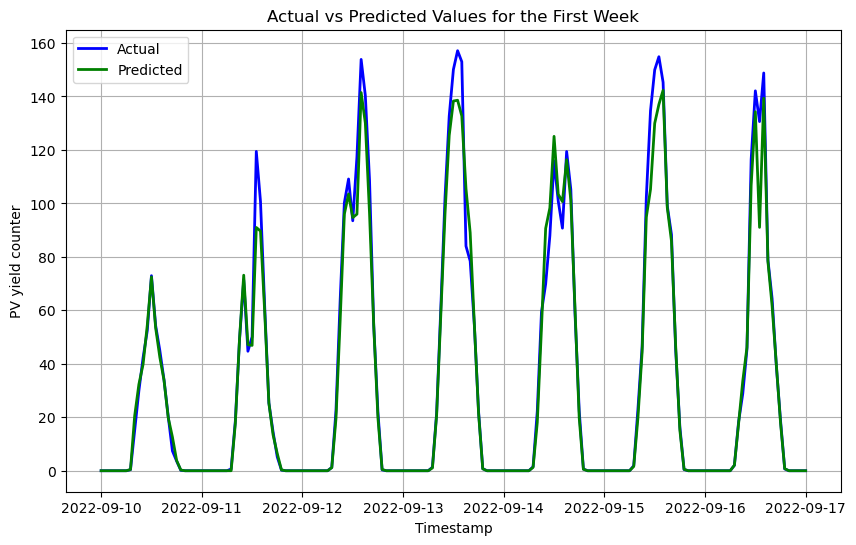

In [12]:
# Filter data for the first week (assuming 'Timestamp' column is in datetime format)
first_week_data = data[data['Timestamp'] <= data['Timestamp'].iloc[0] + pd.DateOffset(7)]

X_first_week = first_week_data[features]
y_first_week_actual = first_week_data[target]

predictions_first_week = random_forest_model.predict(X_first_week)

plt.figure(figsize=(10, 6))

plt.plot(first_week_data['Timestamp'], y_first_week_actual, color='blue', label='Actual', linewidth=2)
plt.plot(first_week_data['Timestamp'], predictions_first_week, color='green', label='Predicted', linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('Actual vs Predicted Values for the First Week')
plt.legend()
plt.grid(True)
plt.show()


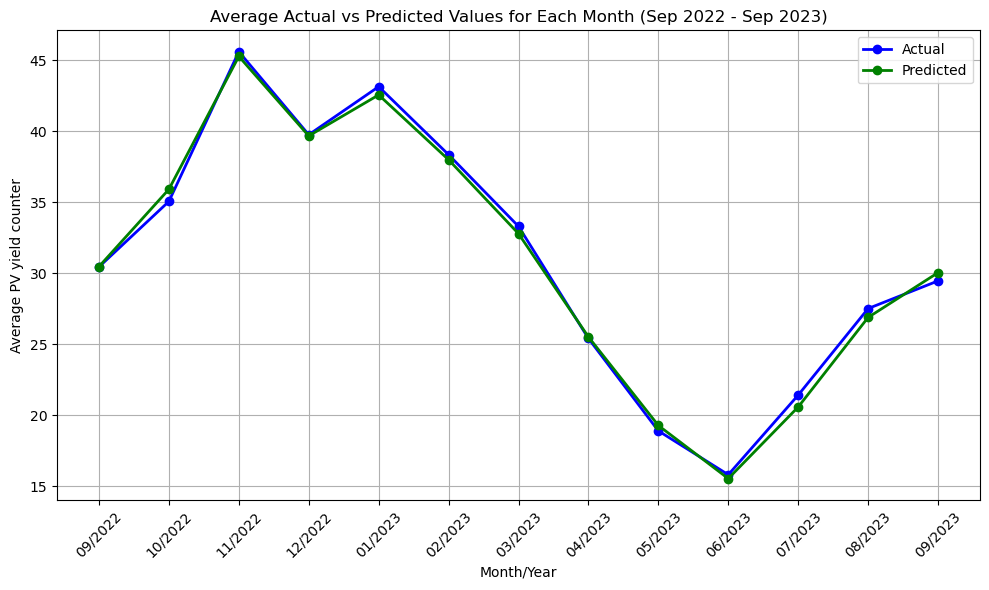

In [14]:
import numpy as np

# Group data by month and year and calculate actual versus predicted values for each month
monthly_actual_values = []
monthly_predictions = []
months = []
years = []

for year in range(2022, 2024):  # Loop through 2022 and 2023
    for month in range(1, 13):  # Loop through months from January to December
        # Filter data for the current month and year
        month_data = data[(data['Timestamp'].dt.year == year) & (data['Timestamp'].dt.month == month)]
        
        # Exclude the first week's data for each month
        if len(month_data) > 7:
            # Features for the current month
            X_month = month_data[features]
            
            # Make predictions for the current month
            predictions_month = random_forest_model.predict(X_month)
            
            # Append actual and predicted values and corresponding month and year
            monthly_actual_values.append(month_data[target].mean())
            monthly_predictions.append(predictions_month.mean())
            months.append(month)
            years.append(year)

# Plot average actual vs predicted values for each month
plt.figure(figsize=(10, 6))
plt.plot([f"{months[i]:02d}/{years[i]}" for i in range(len(months))], monthly_actual_values, marker='o', color='blue', label='Actual', linewidth=2)
plt.plot([f"{months[i]:02d}/{years[i]}" for i in range(len(months))], monthly_predictions, marker='o', color='green', label='Predicted', linewidth=2)
plt.xlabel('Month/Year')
plt.ylabel('Average PV yield counter')
plt.title('Average Actual vs Predicted Values for Each Month (Sep 2022 - Sep 2023)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Error')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()



KeyboardInterrupt



In [ ]:
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data[target], color='blue', label='Data points')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs. {target}')
    plt.grid(True)
    plt.legend()
    plt.show()


# Ocotber 2022

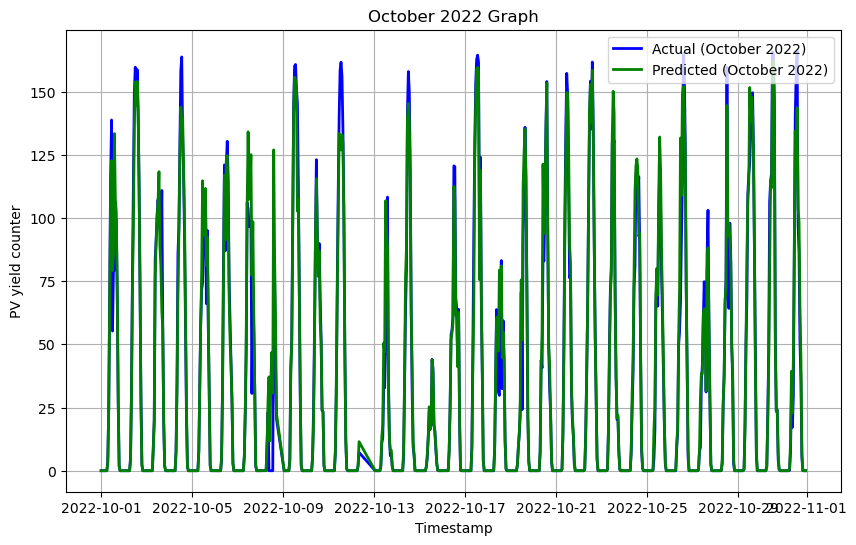

October 2022 Metrics:
MAE: 3.86
MSE: 85.52
RMSE: 9.25
R^2: 0.96
MAPE: 2.44%


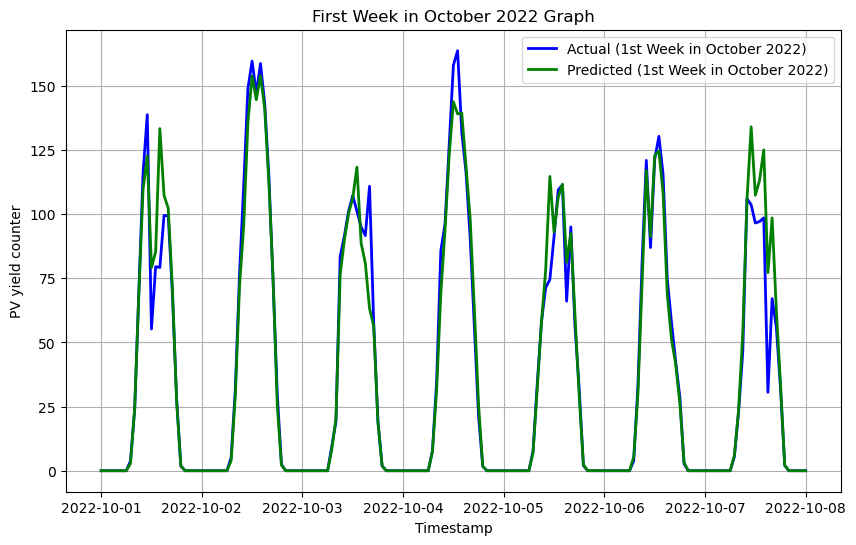

First Week in October 2022 Metrics:
MAE: 4.15
MSE: 97.22
RMSE: 9.86
R^2: 0.96
MAPE: 1.80%


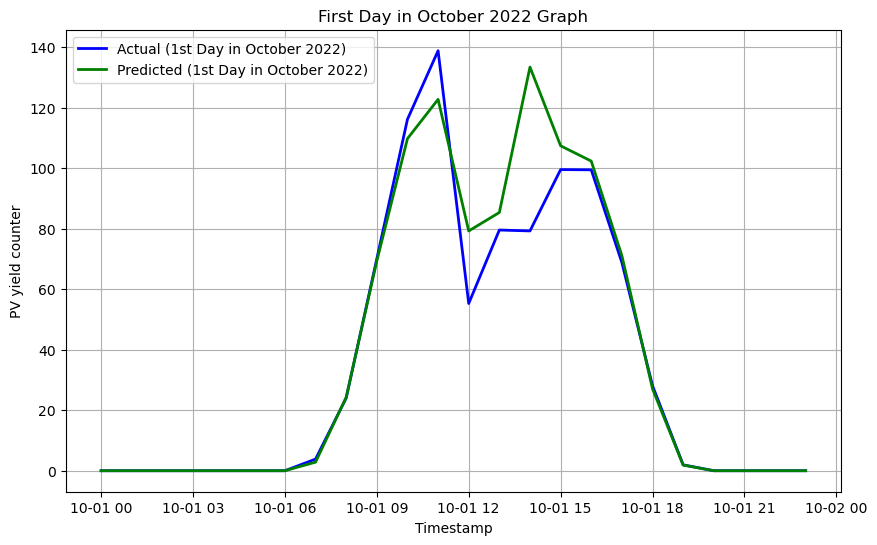

First Day in October 2022 Metrics:
MAE: 5.10
MSE: 163.15
RMSE: 12.77
R^2: 0.92
MAPE: 8.32%


In [17]:
# Filter data for October 2022
october_data = data[(data['Timestamp'].dt.year == 2022) & (data['Timestamp'].dt.month == 10)]

first_week_october_data = october_data[(october_data['Timestamp'] >= october_data['Timestamp'].iloc[0]) & 
                                        (october_data['Timestamp'] <= october_data['Timestamp'].iloc[0] + pd.DateOffset(7))]

first_day_october_data = october_data[(october_data['Timestamp'] >= october_data['Timestamp'].iloc[0]) & 
                                       (october_data['Timestamp'].dt.day == 1)]

X_october = october_data[features]
y_october_actual = october_data[target]

X_first_week_october = first_week_october_data[features]
y_first_week_october_actual = first_week_october_data[target]

X_first_day_october = first_day_october_data[features]
y_first_day_october_actual = first_day_october_data[target]

predictions_october = random_forest_model.predict(X_october)
predictions_first_week_october = random_forest_model.predict(X_first_week_october)
predictions_first_day_october = random_forest_model.predict(X_first_day_october)

mae_october = mean_absolute_error(y_october_actual, predictions_october)
mse_october = mean_squared_error(y_october_actual, predictions_october)
rmse_october = mean_squared_error(y_october_actual, predictions_october, squared=False)
r2_october = r2_score(y_october_actual, predictions_october)


average_y_october = y_october_actual.mean()
average_predictions_october = predictions_october.mean()
mape_october = abs((average_y_october - average_predictions_october) / average_y_october) * 100

mae_first_week_october = mean_absolute_error(y_first_week_october_actual, predictions_first_week_october)
mse_first_week_october = mean_squared_error(y_first_week_october_actual, predictions_first_week_october)
rmse_first_week_october = mean_squared_error(y_first_week_october_actual, predictions_first_week_october, squared=False)
r2_first_week_october = r2_score(y_first_week_october_actual, predictions_first_week_october)


average_y_first_week_october = y_first_week_october_actual.mean()
average_predictions_first_week_october = predictions_first_week_october.mean()
mape_first_week_october = abs((average_y_first_week_october - average_predictions_first_week_october) / average_y_first_week_october) * 100

mae_first_day_october = mean_absolute_error(y_first_day_october_actual, predictions_first_day_october)
mse_first_day_october = mean_squared_error(y_first_day_october_actual, predictions_first_day_october)
rmse_first_day_october = mean_squared_error(y_first_day_october_actual, predictions_first_day_october, squared=False)
r2_first_day_october = r2_score(y_first_day_october_actual, predictions_first_day_october)

average_y_first_day_october = y_first_day_october_actual.mean()
average_predictions_first_day_october = predictions_first_day_october.mean()
mape_first_day_october = abs((average_y_first_day_october - average_predictions_first_day_october) / average_y_first_day_october) * 100


plt.figure(figsize=(10, 6))
plt.plot(october_data['Timestamp'], y_october_actual, color='blue', label='Actual (October 2022)', linewidth=2)
plt.plot(october_data['Timestamp'], predictions_october, color='green', label='Predicted (October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("October 2022 Metrics:")
print(f'MAE: {mae_october:.2f}')
print(f'MSE: {mse_october:.2f}')
print(f'RMSE: {rmse_october:.2f}')
print(f'R^2: {r2_october:.2f}')
print(f'MAPE: {mape_october:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(first_week_october_data['Timestamp'], y_first_week_october_actual, color='blue', label='Actual (1st Week in October 2022)', linewidth=2)
plt.plot(first_week_october_data['Timestamp'], predictions_first_week_october, color='green', label='Predicted (1st Week in October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Week in October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Week in October 2022 Metrics:")
print(f'MAE: {mae_first_week_october:.2f}')
print(f'MSE: {mse_first_week_october:.2f}')
print(f'RMSE: {rmse_first_week_october:.2f}')
print(f'R^2: {r2_first_week_october:.2f}')
print(f'MAPE: {mape_first_week_october:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(first_day_october_data['Timestamp'], y_first_day_october_actual, color='blue', label='Actual (1st Day in October 2022)', linewidth=2)
plt.plot(first_day_october_data['Timestamp'], predictions_first_day_october, color='green', label='Predicted (1st Day in October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Day in October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Day in October 2022 Metrics:")
print(f'MAE: {mae_first_day_october:.2f}')
print(f'MSE: {mse_first_day_october:.2f}')
print(f'RMSE: {rmse_first_day_october:.2f}')
print(f'R^2: {r2_first_day_october:.2f}')
print(f'MAPE: {mape_first_day_october:.2f}%')


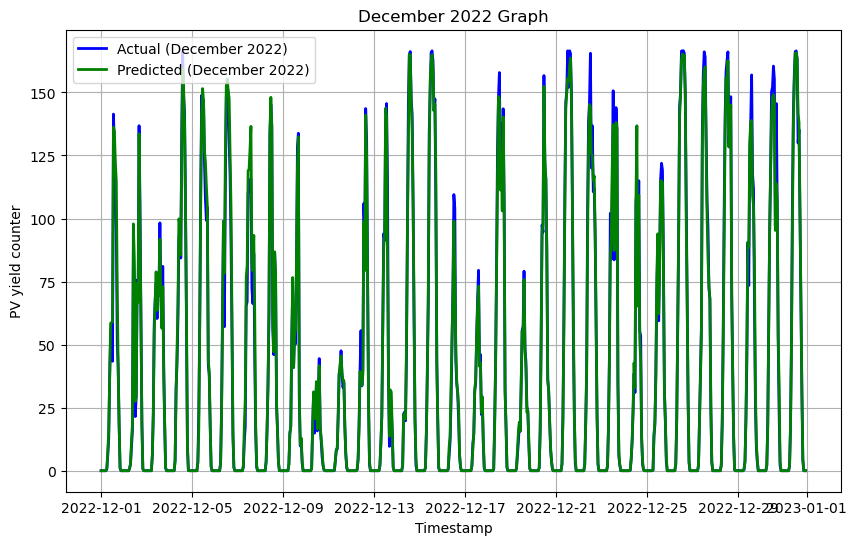

December 2022 Metrics:
MAE: 2.30
MSE: 23.08
RMSE: 4.80
R^2: 0.99
MAPE: 0.21%


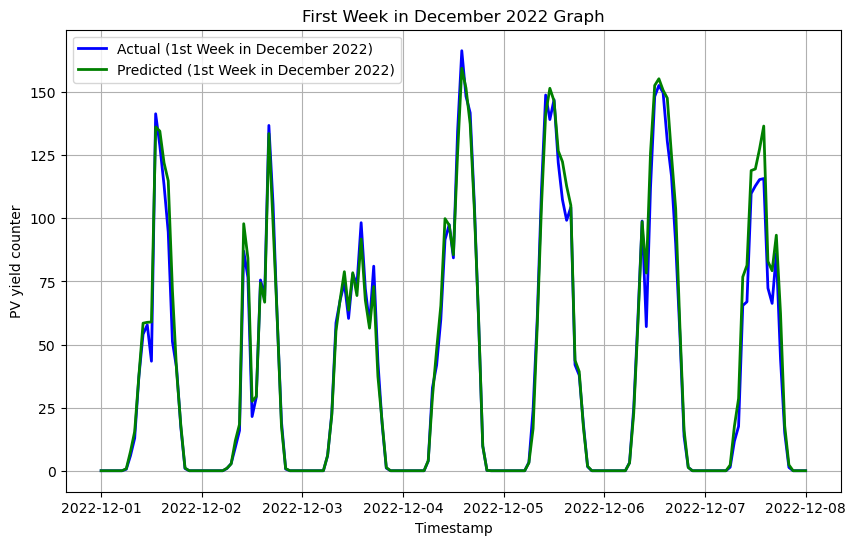

First Week in December 2022 Metrics:
MAE: 3.22
MSE: 35.21
RMSE: 5.93
R^2: 0.99
MAPE: 4.66%


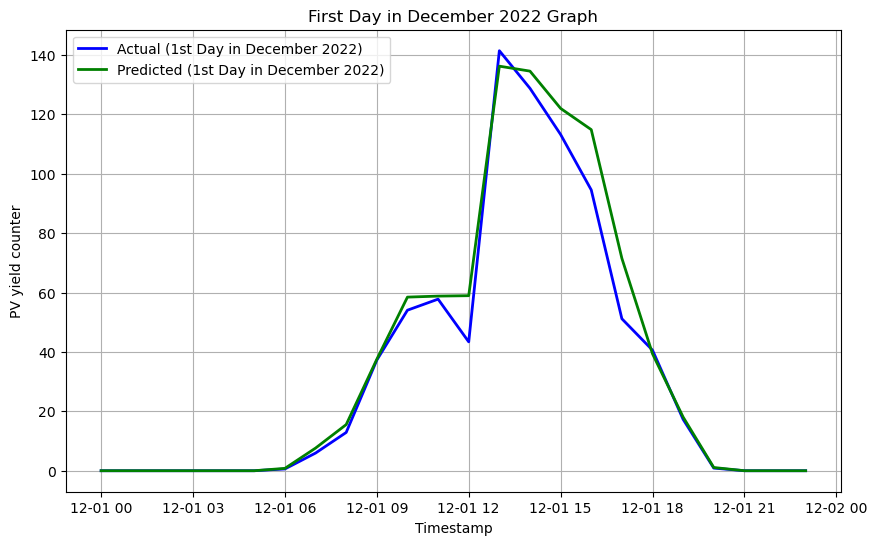

First Day in December 2022 Metrics:
MAE: 3.68
MSE: 51.56
RMSE: 7.18
R^2: 0.97
MAPE: 9.44%


In [18]:
# Filter data for December 2022
december_data = data[(data['Timestamp'].dt.year == 2022) & (data['Timestamp'].dt.month == 12)]

first_week_december_data = december_data[(december_data['Timestamp'] >= december_data['Timestamp'].iloc[0]) & 
                                        (december_data['Timestamp'] <= december_data['Timestamp'].iloc[0] + pd.DateOffset(7))]

first_day_december_data = december_data[(december_data['Timestamp'] >= december_data['Timestamp'].iloc[0]) & 
                                       (december_data['Timestamp'].dt.day == 1)]

X_december = december_data[features]
y_december_actual = december_data[target]

X_first_week_december = first_week_december_data[features]
y_first_week_december_actual = first_week_december_data[target]

X_first_day_december = first_day_december_data[features]
y_first_day_december_actual = first_day_december_data[target]

predictions_december = random_forest_model.predict(X_december)
predictions_first_week_december = random_forest_model.predict(X_first_week_december)
predictions_first_day_december = random_forest_model.predict(X_first_day_december)

mae_december = mean_absolute_error(y_december_actual, predictions_december)
mse_december = mean_squared_error(y_december_actual, predictions_december)
rmse_december = mean_squared_error(y_december_actual, predictions_december, squared=False)
r2_december = r2_score(y_december_actual, predictions_december)

average_y_december = y_december_actual.mean()
average_predictions_december = predictions_december.mean()
mape_december = abs((average_y_december - average_predictions_december) / average_y_december) * 100

mae_first_week_december = mean_absolute_error(y_first_week_december_actual, predictions_first_week_december)
mse_first_week_december = mean_squared_error(y_first_week_december_actual, predictions_first_week_december)
rmse_first_week_december = mean_squared_error(y_first_week_december_actual, predictions_first_week_december, squared=False)
r2_first_week_december = r2_score(y_first_week_december_actual, predictions_first_week_december)

average_y_first_week_december = y_first_week_december_actual.mean()
average_predictions_first_week_december = predictions_first_week_december.mean()
mape_first_week_december = abs((average_y_first_week_december - average_predictions_first_week_december) / average_y_first_week_december) * 100

mae_first_day_december = mean_absolute_error(y_first_day_december_actual, predictions_first_day_december)
mse_first_day_december = mean_squared_error(y_first_day_december_actual, predictions_first_day_december)
rmse_first_day_december = mean_squared_error(y_first_day_december_actual, predictions_first_day_december, squared=False)
r2_first_day_december = r2_score(y_first_day_december_actual, predictions_first_day_december)

average_y_first_day_december = y_first_day_december_actual.mean()
average_predictions_first_day_december = predictions_first_day_december.mean()
mape_first_day_december = abs((average_y_first_day_december - average_predictions_first_day_december) / average_y_first_day_december) * 100


plt.figure(figsize=(10, 6))
plt.plot(december_data['Timestamp'], y_december_actual, color='blue', label='Actual (December 2022)', linewidth=2)
plt.plot(december_data['Timestamp'], predictions_december, color='green', label='Predicted (December 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('December 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("December 2022 Metrics:")
print(f'MAE: {mae_december:.2f}')
print(f'MSE: {mse_december:.2f}')
print(f'RMSE: {rmse_december:.2f}')
print(f'R^2: {r2_december:.2f}')
print(f'MAPE: {mape_december:.2f}%')


plt.figure(figsize=(10, 6))
plt.plot(first_week_december_data['Timestamp'], y_first_week_december_actual, color='blue', label='Actual (1st Week in December 2022)', linewidth=2)
plt.plot(first_week_december_data['Timestamp'], predictions_first_week_december, color='green', label='Predicted (1st Week in December 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Week in December 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Week in December 2022 Metrics:")
print(f'MAE: {mae_first_week_december:.2f}')
print(f'MSE: {mse_first_week_december:.2f}')
print(f'RMSE: {rmse_first_week_december:.2f}')
print(f'R^2: {r2_first_week_december:.2f}')
print(f'MAPE: {mape_first_week_december:.2f}%')


plt.figure(figsize=(10, 6))
plt.plot(first_day_december_data['Timestamp'], y_first_day_december_actual, color='blue', label='Actual (1st Day in December 2022)', linewidth=2)
plt.plot(first_day_december_data['Timestamp'], predictions_first_day_december, color='green', label='Predicted (1st Day in December 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Day in December 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Day in December 2022 Metrics:")
print(f'MAE: {mae_first_day_december:.2f}')
print(f'MSE: {mse_first_day_december:.2f}')
print(f'RMSE: {rmse_first_day_december:.2f}')
print(f'R^2: {r2_first_day_december:.2f}')
print(f'MAPE: {mape_first_day_december:.2f}%')


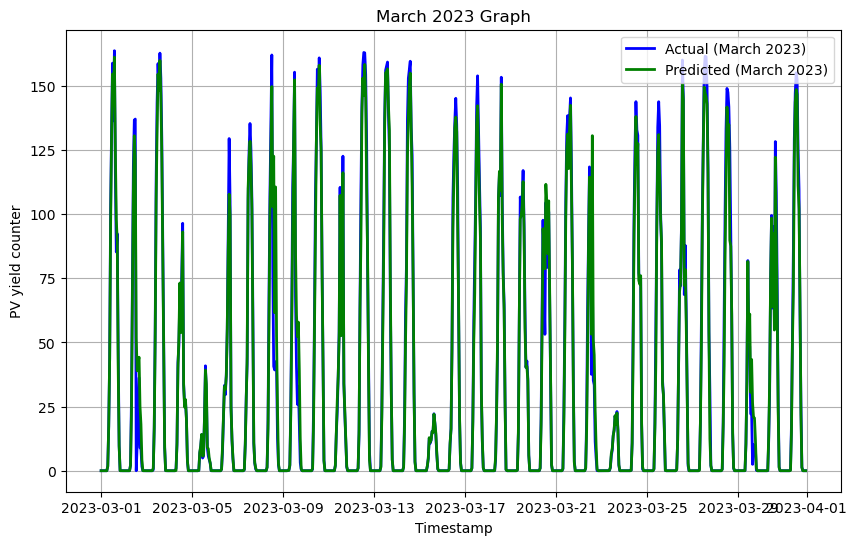

March 2023 Metrics:
MAE: 2.95
MSE: 53.86
RMSE: 7.34
R^2: 0.98
MAPE: 1.54%


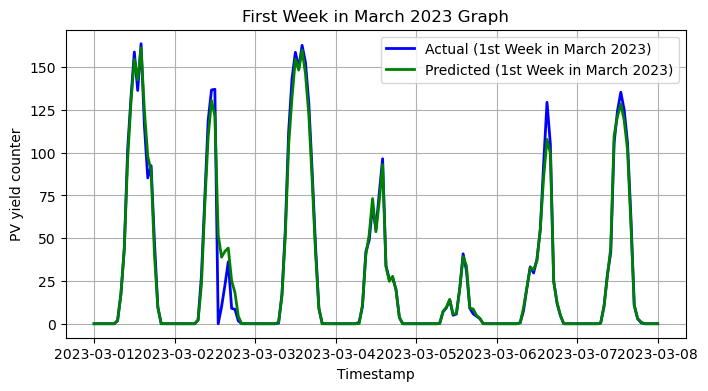

First Week in March 2023 Metrics:
MAE: 2.36
MSE: 37.47
RMSE: 6.12
R^2: 0.98
MAPE: 0.07%


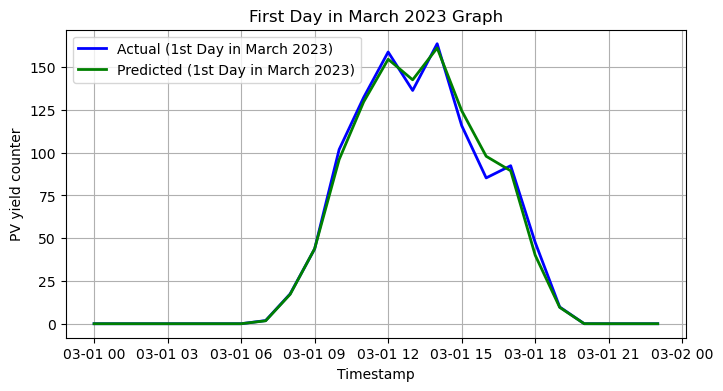

First Day in March 2023 Metrics:
MAE: 2.24
MSE: 16.84
RMSE: 4.10
R^2: 1.00
MAPE: 0.13%


In [19]:
# Filter data for March 2023
march_data = data[(data['Timestamp'].dt.year == 2023) & (data['Timestamp'].dt.month == 3)]

first_week_march_data = march_data[(march_data['Timestamp'] >= march_data['Timestamp'].iloc[0]) & 
                                        (march_data['Timestamp'] <= march_data['Timestamp'].iloc[0] + pd.DateOffset(7))]

first_day_march_data = march_data[(march_data['Timestamp'] >= march_data['Timestamp'].iloc[0]) & 
                                       (march_data['Timestamp'].dt.day == 1)]

X_march = march_data[features]
y_march_actual = march_data[target]

X_first_week_march = first_week_march_data[features]
y_first_week_march_actual = first_week_march_data[target]

X_first_day_march = first_day_march_data[features]
y_first_day_march_actual = first_day_march_data[target]

predictions_march = random_forest_model.predict(X_march)
predictions_first_week_march = random_forest_model.predict(X_first_week_march)
predictions_first_day_march = random_forest_model.predict(X_first_day_march)

mae_march = mean_absolute_error(y_march_actual, predictions_march)
mse_march = mean_squared_error(y_march_actual, predictions_march)
rmse_march = mean_squared_error(y_march_actual, predictions_march, squared=False)
r2_march = r2_score(y_march_actual, predictions_march)

average_y_march = y_march_actual.mean()
average_predictions_march = predictions_march.mean()
mape_march = abs((average_y_march - average_predictions_march) / average_y_march) * 100

mae_first_week_march = mean_absolute_error(y_first_week_march_actual, predictions_first_week_march)
mse_first_week_march = mean_squared_error(y_first_week_march_actual, predictions_first_week_march)
rmse_first_week_march = mean_squared_error(y_first_week_march_actual, predictions_first_week_march, squared=False)
r2_first_week_march = r2_score(y_first_week_march_actual, predictions_first_week_march)

average_y_first_week_march = y_first_week_march_actual.mean()
average_predictions_first_week_march = predictions_first_week_march.mean()
mape_first_week_march = abs((average_y_first_week_march - average_predictions_first_week_march) / average_y_first_week_march) * 100

mae_first_day_march = mean_absolute_error(y_first_day_march_actual, predictions_first_day_march)
mse_first_day_march = mean_squared_error(y_first_day_march_actual, predictions_first_day_march)
rmse_first_day_march = mean_squared_error(y_first_day_march_actual, predictions_first_day_march, squared=False)
r2_first_day_march = r2_score(y_first_day_march_actual, predictions_first_day_march)

average_y_first_day_march = y_first_day_march_actual.mean()
average_predictions_first_day_march = predictions_first_day_march.mean()
mape_first_day_march = abs((average_y_first_day_march - average_predictions_first_day_march) / average_y_first_day_march) * 100

plt.figure(figsize=(10, 6))
plt.plot(march_data['Timestamp'], y_march_actual, color='blue', label='Actual (March 2023)', linewidth=2)
plt.plot(march_data['Timestamp'], predictions_march, color='green', label='Predicted (March 2023)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('March 2023 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("March 2023 Metrics:")
print(f'MAE: {mae_march:.2f}')
print(f'MSE: {mse_march:.2f}')
print(f'RMSE: {rmse_march:.2f}')
print(f'R^2: {r2_march:.2f}')
print(f'MAPE: {mape_march:.2f}%')

plt.figure(figsize=(8, 4))
plt.plot(first_week_march_data['Timestamp'], y_first_week_march_actual, color='blue', label='Actual (1st Week in March 2023)', linewidth=2)
plt.plot(first_week_march_data['Timestamp'], predictions_first_week_march, color='green', label='Predicted (1st Week in March 2023)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Week in March 2023 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Week in March 2023 Metrics:")
print(f'MAE: {mae_first_week_march:.2f}')
print(f'MSE: {mse_first_week_march:.2f}')
print(f'RMSE: {rmse_first_week_march:.2f}')
print(f'R^2: {r2_first_week_march:.2f}')
print(f'MAPE: {mape_first_week_march:.2f}%')

plt.figure(figsize=(8, 4))
plt.plot(first_day_march_data['Timestamp'], y_first_day_march_actual, color='blue', label='Actual (1st Day in March 2023)', linewidth=2)
plt.plot(first_day_march_data['Timestamp'], predictions_first_day_march, color='green', label='Predicted (1st Day in March 2023)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Day in March 2023 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Day in March 2023 Metrics:")
print(f'MAE: {mae_first_day_march:.2f}')
print(f'MSE: {mse_first_day_march:.2f}')
print(f'RMSE: {rmse_first_day_march:.2f}')
print(f'R^2: {r2_first_day_march:.2f}')
print(f'MAPE: {mape_first_day_march:.2f}%')
